In [1]:
%load_ext autoreload
%autoreload 2

import glob
import sys
sys.path.insert(0, "../")

from motiflets.competitors import *
from motiflets.plotting import *

import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")


def load_pyattimo(df_all):
    paths = {
        "200GB": "../tests/results/pyattimo_0.7.0_200GB",    
        "20GB": "../tests/results/pyattimo_0.7.0_20GB",
        "8GB": "../tests/results/pyattimo_0.7.0_8GB",
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                filename = os.path.basename(key)
                end = filename.find("pyattimo")
                df["dataset"] = filename[14:end-4]
                # df["dataset"] = key.split("_")[4]
            
            df_config = pd.concat(dfs, ignore_index=True)
            df_config["version"] = "pyattimo " + name
        
            # df_config.info()
            
            df_all = pd.concat([df_all, df_config], ignore_index=True)
        else:
            print("Does not exist")

    return df_all


def load_scalable(df_all):
    paths = {
        "scalable_sub": "../tests/results/scalable_sub",    
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                factor = key.split("_")[-1][:-4]
                if int(factor) != 8:
                    filename = os.path.basename(key)
                    # df["dataset"] = filename.split("_")[2]
                    end = filename.find("scalable")
                    df["dataset"] = filename[14:end-4]            
                    df["version"] = "MASS / PAA " + key.split("_")[-1][:-4]
            
            df_config = pd.concat(dfs, ignore_index=True)
            df_all = pd.concat([df_all, df_config], ignore_index=True)
        else:
            print("Does not exist")

    return df_all

def load_pynndescent(df_all):
    paths = {
        "pynndescent": "../tests/results/pynndescent",    
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                filename = os.path.basename(key)
                end = filename.find("pynndescent")
                df["dataset"] = filename[14:end-4]            
                df["version"] = "pynndescent"
            
            df_config = pd.concat(dfs, ignore_index=True)
            df_all = pd.concat([df_all, df_config], ignore_index=True)
        
            # display(df_config)
        else:
            print("Does not exist")
                
    return df_all

def load_faiss(df_all):
    paths = {
        "HNSW": "../tests/results/faiss_HNSW",
        "IVF": "../tests/results/faiss_IVF",
        "LSH": "../tests/results/faiss_LSH",
        "IVFPQ": "../tests/results/faiss_IVFPQ",
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                filename = os.path.basename(key)
                end = filename.find("faiss_backend")
                df["dataset"] = filename[14:end-4]
                # print(filename[14:end-4])
                df["version"] = name
            
            df_config = pd.concat(dfs, ignore_index=True)
            df_all = pd.concat([df_all, df_config], ignore_index=True)
    
            # display(df_config)
        else:
            print("Does not exist")

    return df_all        

In [2]:
df_all = pd.DataFrame()
df_all = load_pyattimo(df_all)
df_all = load_scalable(df_all)
df_all = load_faiss(df_all)
df_all = load_pynndescent(df_all)

# not enough data from all datasets
df_all = df_all[df_all["motif length"] != 8192]
# display(df_all)

Reading from../tests/results/pyattimo_0.7.0_200GB
Reading from../tests/results/pyattimo_0.7.0_20GB
Reading from../tests/results/pyattimo_0.7.0_8GB
Reading from../tests/results/scalable_sub
Reading from../tests/results/faiss_HNSW
Reading from../tests/results/faiss_IVF
Reading from../tests/results/faiss_LSH
Reading from../tests/results/faiss_IVFPQ
Reading from../tests/results/pynndescent


In [23]:
print("Total number of datasets:    ", df_all.dataset.unique().shape[0])

# Filter
counts = df_all.groupby(["dataset", "version"]).size()
counts_df = counts.reset_index(name='count')

count_versions = df_all.version.nunique()

# filter datasets where not all indices ran
def all_counts_equal(group):
    return group['version'].nunique() >= count_versions-1 and group['count'].min() >= 3

datasets_to_keep = counts_df.groupby('dataset').filter(all_counts_equal)['dataset'].unique()

print("Filtered number of datasets: ", datasets_to_keep.shape[0])
filtered_df = df_all[df_all["dataset"].isin(datasets_to_keep)]

df_display = pd.DataFrame(data=filtered_df[["dataset", "length"]].drop_duplicates().sort_values(by="length"))
display(df_display.reset_index(drop=True))

Total number of datasets:     25
Filtered number of datasets:  17


,dataset,length
0,EOG_one_hour_50_Hz,180000
1,Challenge2009TestSetA_101a,440001
2,swtAttack7,449919
3,swtAttack38,449919
4,BlackLeggedKittiwake,1288330
5,stator_winding,1330816
6,EOG_one_hour_400_Hz,1439997
7,Challenge2009Respiration500HZ,1799997
8,HAR_Ambient_Sensor_Data,1875227
9,water,2100777


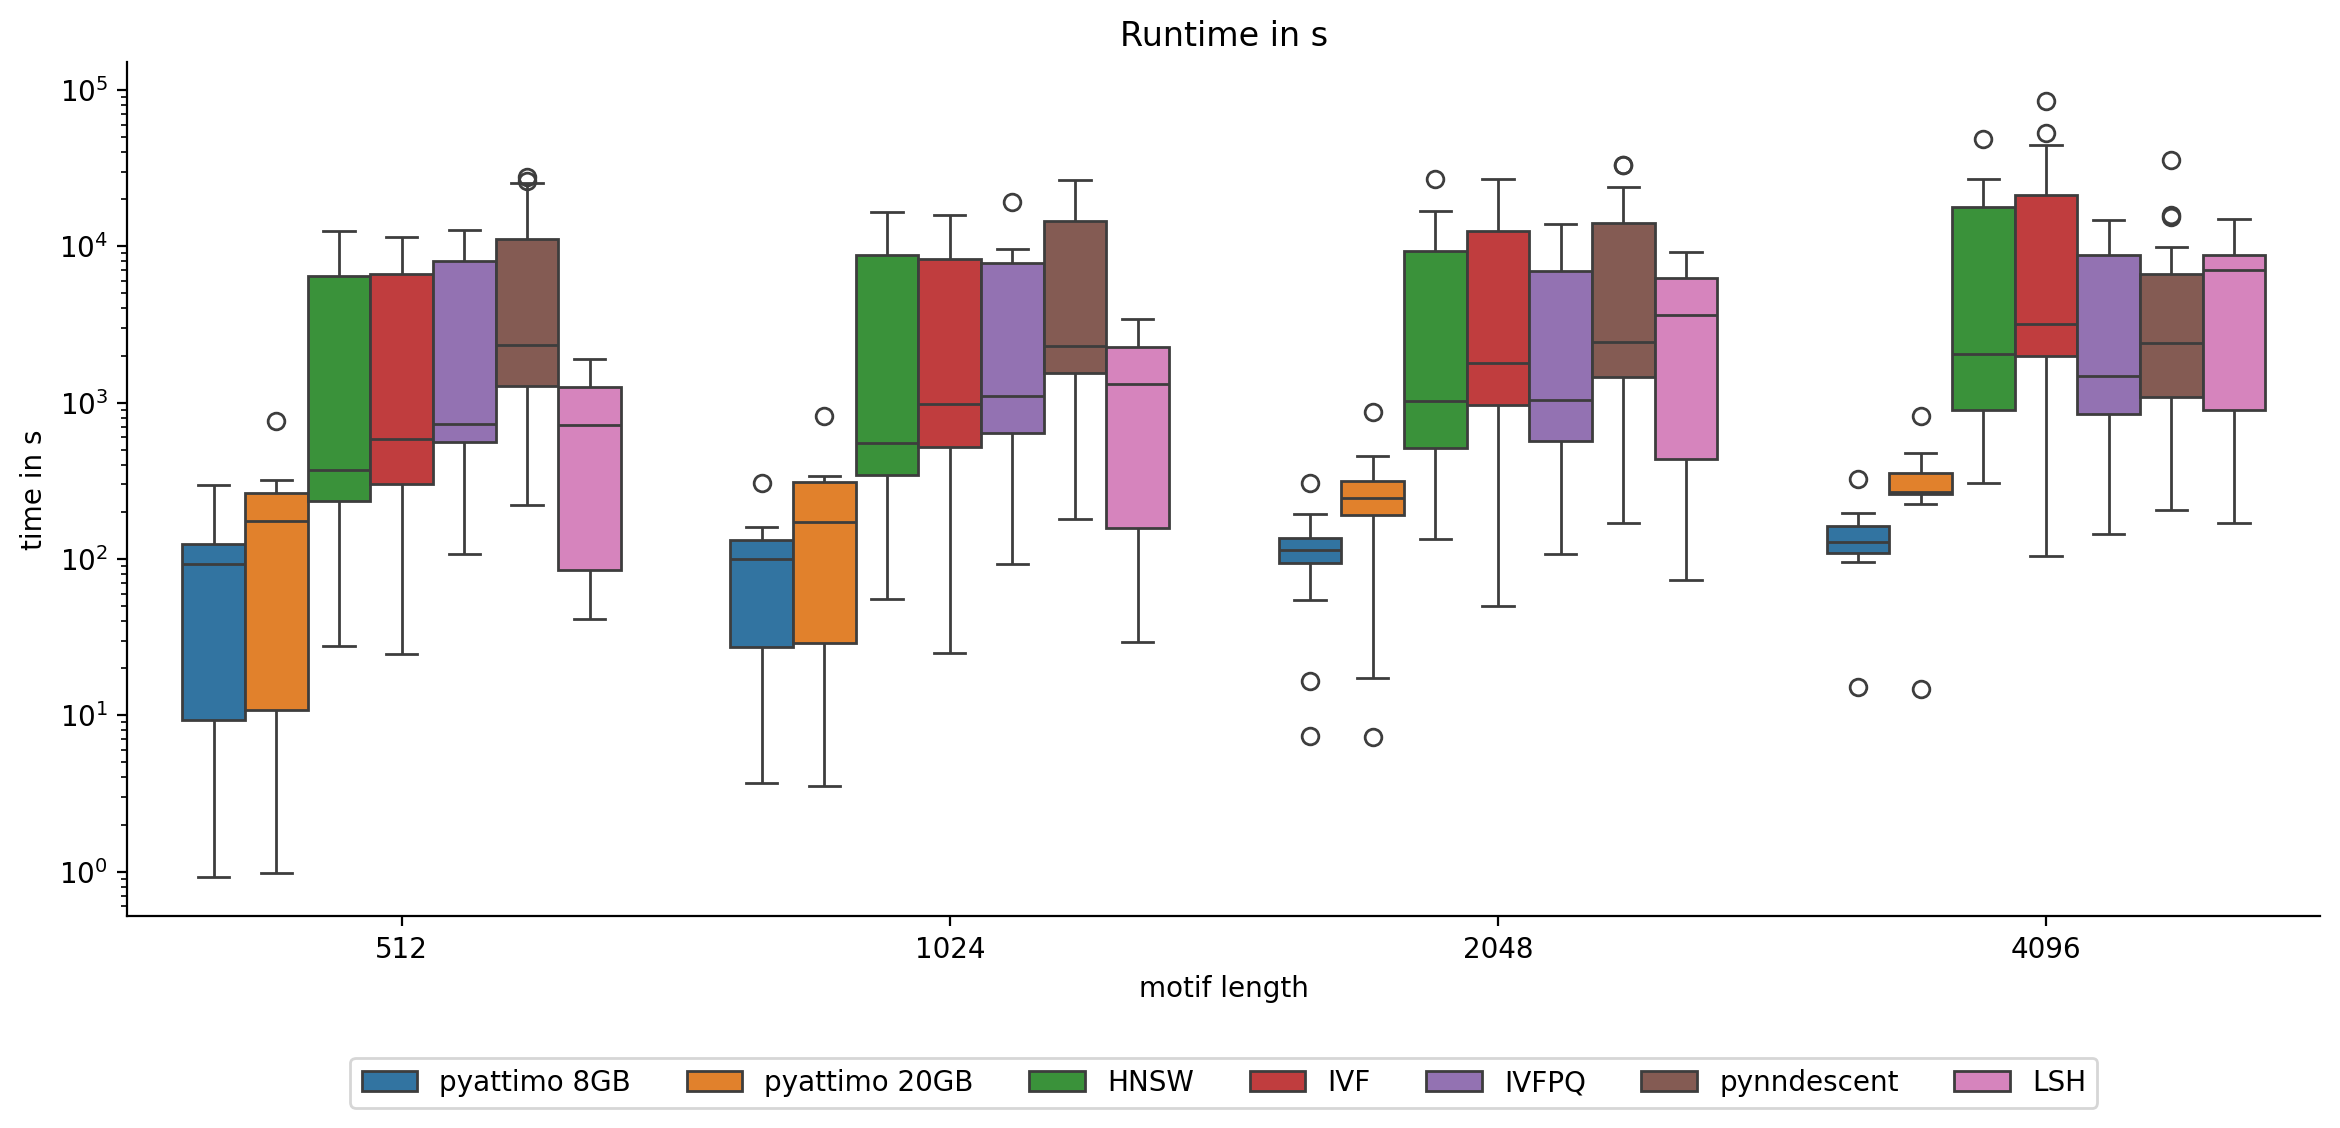

In [24]:
custom_order = ["pyattimo 8GB", "pyattimo 20GB", 
                "HNSW", "IVF", "IVFPQ",    # faiss
                "pynndescent", "LSH",
                # "MASS / PAA 64", "MASS / PAA 32", "MASS / PAA 16"
               ]
filtered_df = filtered_df[filtered_df.version.isin(custom_order)]

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.boxplot(
    y="time in s", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    # palette="muted", 
    ax=ax, 
    # err_style="bars", 
    hue_order=custom_order
)
# ax.tick_params(axis='x', rotation=45)

sns.despine()
plt.tight_layout()
ax.set_title("Runtime in s")
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()

In [25]:
filtered_df.pivot_table(values=["time in s"], index=["version"], columns=["motif length"], aggfunc='median')

time in s                                       
motif length          512          1024         2048         4096
version                                                          
HNSW            372.415364   554.898040  1029.959489  2037.560448
IVF             584.544651   972.087203  1784.582508  3174.021696
IVFPQ           734.228685  1093.832502  1039.794169  1471.653902
LSH             722.083748  1316.173763  3608.084960  7067.433694
pyattimo 20GB   174.925472   173.183862   246.029957   268.428100
pyattimo 8GB     92.681569    99.881843   114.134353   128.064479
pynndescent    2343.063501  2312.087997  2444.649659  2407.566935

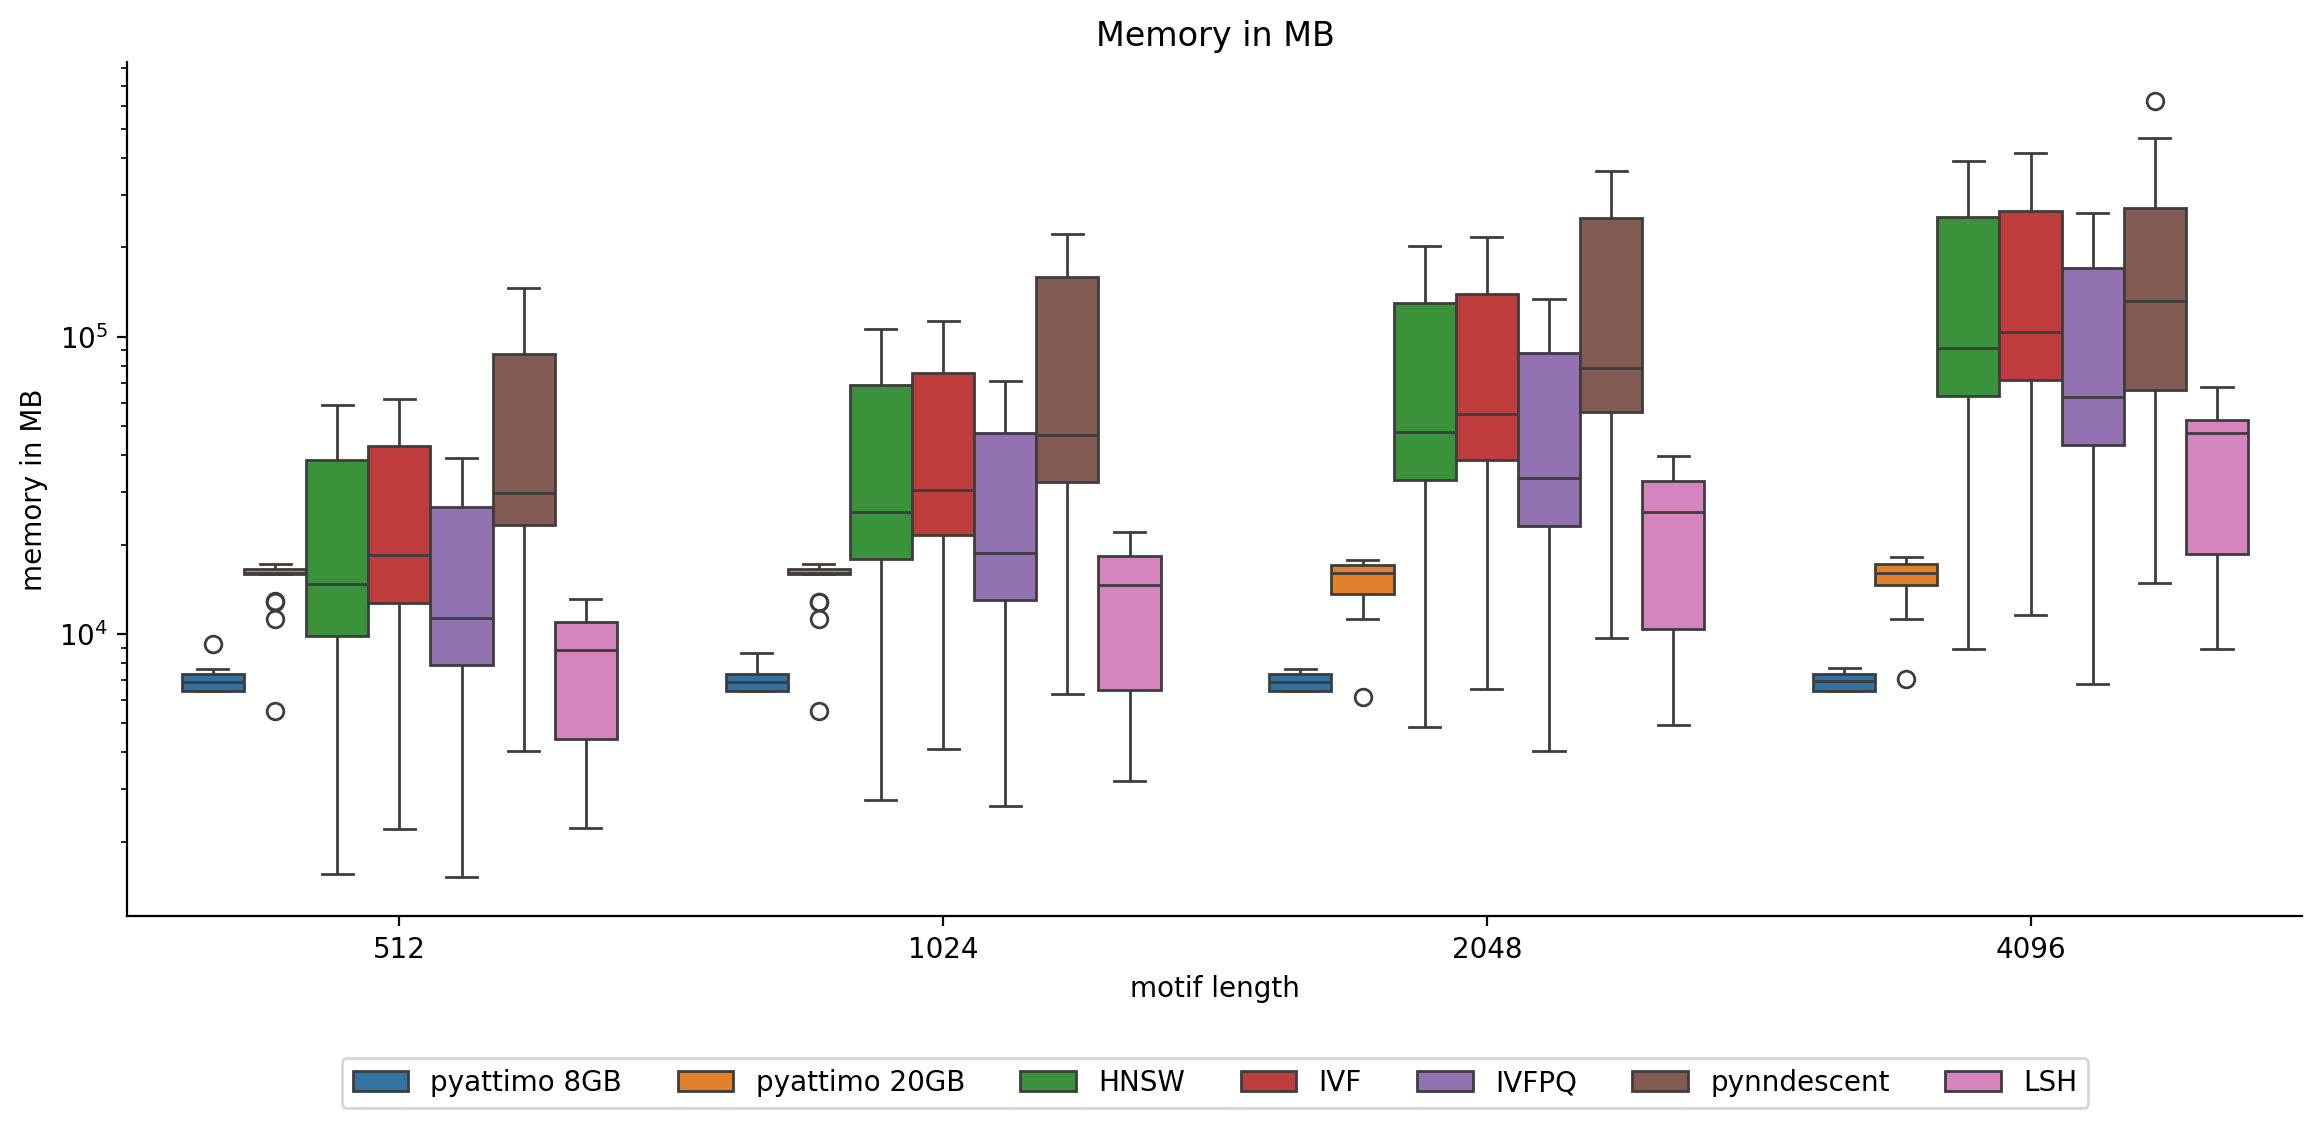

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.boxplot(
    y="memory in MB", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    # palette="muted", 
    ax=ax,    
    hue_order=custom_order
)
# ax.tick_params(axis='x', rotation=45)

sns.despine()
plt.tight_layout()
ax.set_title("Memory in MB")
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()

In [27]:
filtered_df.pivot_table(values=["memory in MB"], index=["version"], columns=["motif length"], aggfunc='median')

memory in MB                                           
motif length           512           1024          2048           4096
version                                                               
HNSW           14729.050781  25805.125000  47820.839844   91702.179688
IVF            18490.636719  30421.132812  54881.980469  103862.269531
IVFPQ          11294.605469  18666.628906  33366.437500   62654.558594
LSH             8844.132812  14577.101562  25670.232422   47399.007812
pyattimo 20GB  16021.960938  16021.960938  16021.960938   16021.960938
pyattimo 8GB    6913.496094   6912.496094   6910.496094    6926.464844
pynndescent    29832.628906  46655.414062  78730.976562  132272.242188

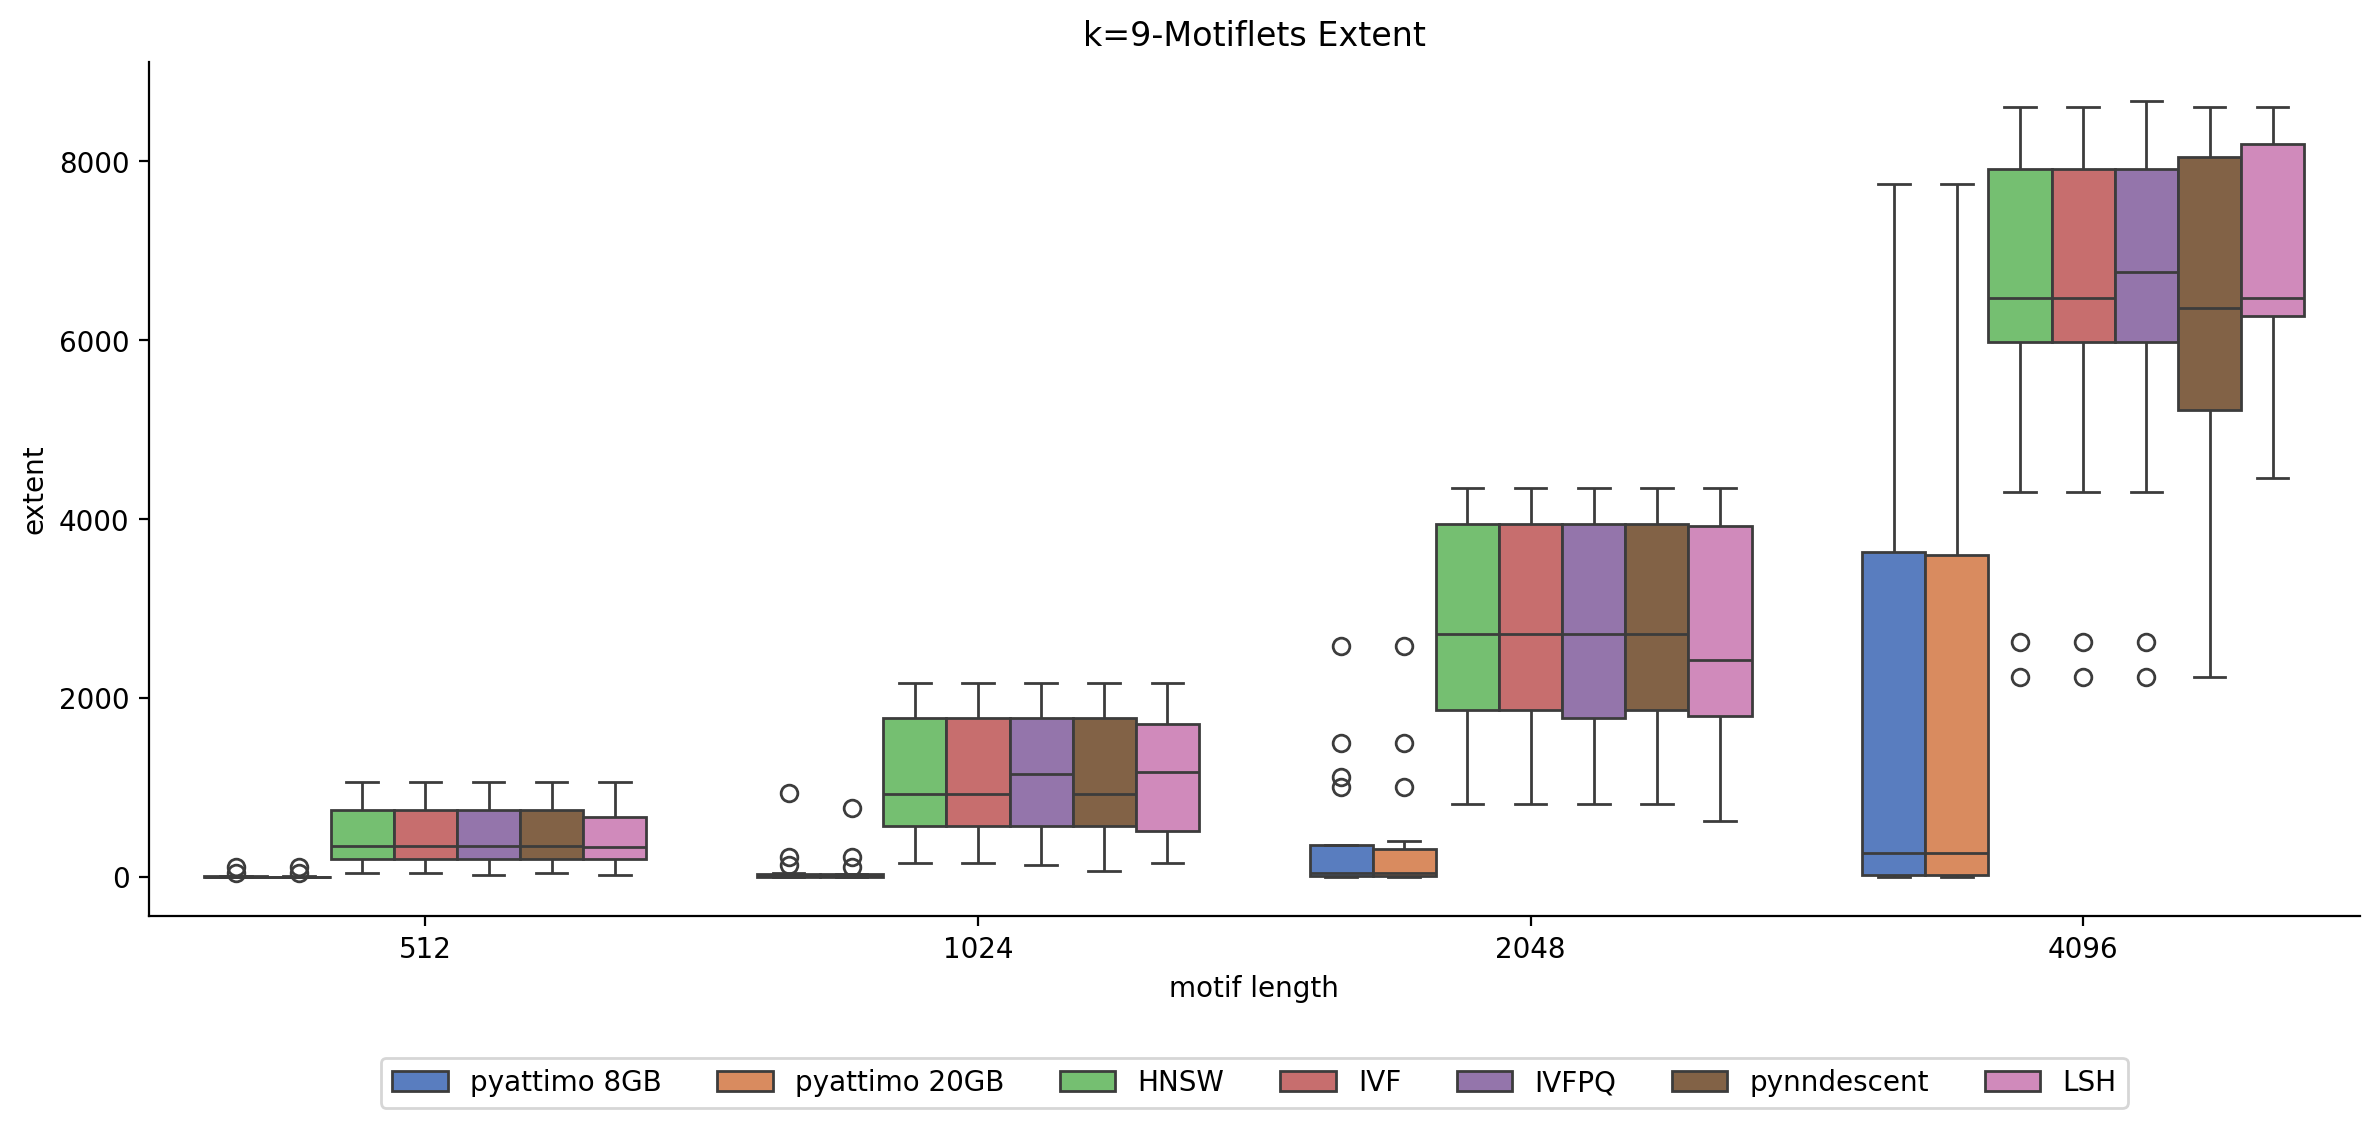

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.boxplot(
    y="extent", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    palette="muted", 
    ax=ax,
    hue_order=custom_order
)
# ax.tick_params(axis='x', rotation=45)

sns.despine()
plt.tight_layout()
ax.set_title("k=9-Motiflets Extent")
# plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()

In [29]:
filtered_df.pivot_table(values=["extent"], index=["version"], columns=["motif length"], aggfunc='median')

extent                                       
motif length         512          1024         2048         4096
version                                                         
HNSW           344.383731   932.209002  2713.758970  6469.498729
IVF            344.383731   932.209002  2713.758970  6469.498729
IVFPQ          344.383731  1151.609542  2713.758970  6769.620375
LSH            336.734605  1174.006855  2421.860936  6469.498729
pyattimo 20GB    0.979891    10.623609    48.510840   268.409693
pyattimo 8GB     0.979891    10.623609    48.361937   268.612881
pynndescent    344.383731   932.214488  2713.758970  6366.196964